In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import nltk
from nltk.tokenize import word_tokenize
import re
from pprint import pprint
# Gensim
import gensim, logging, warnings
# import spacy
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [172]:
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [171]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [207]:
df0 = pd.read_csv('scrape1.csv', index_col = 0)
df1 = pd.read_csv('scrape2.csv', index_col = 0)
df2 = pd.read_csv('scrape3.csv', index_col = 0)
df3 = pd.read_csv('scrape4.csv', index_col = 0)
df4 = pd.read_csv('scrape5.csv', index_col = 0)
df5 = pd.read_csv('scrape6.csv', index_col = 0)
df6 = pd.read_csv('scrape7.csv', index_col = 0)
df7 = pd.read_csv('scrape8.csv', index_col = 0)
df10 = pd.read_csv('scrape11.csv', index_col = 0)
df12 = pd.read_csv('scrape12.csv', index_col=0)

In [212]:
df13 = pd.read_csv('scrape13.csv', index_col = 0)

In [216]:
df13

,abv,avail,avg_score,ba_score,brewery,img,location,name,no_ratings,no_reviews,review,style,url
0,9.3%,Rotating,4.11,NaN,Tired Hands Brewing Company,https://cdn.beeradvocate.com/im/placeholder-be...,Pennsylvania,Some Milk,5,0,['4.13/5\xa0\xa0rDev +0.5%look: 4 | smell: 4 |...,American Imperial Stout,https://www.beeradvocate.com/beer/profile/2838...
1,12%,Rotating,4.40,NaN,AleSmith Brewing Company,https://cdn.beeradvocate.com/im/placeholder-be...,California,Speedway Stout - Kona Coffee - Bourbon Barrel-...,5,1,['4.34/5\xa0\xa0rDev -1.4%look: 4.25 | smell: ...,American Imperial Stout,https://www.beeradvocate.com/beer/profile/396/...
2,10%,Rotating,3.84,NaN,Ingenious Brewing Company,https://cdn.beeradvocate.com/im/placeholder-be...,Texas,Pralines N Cream Ice Cream Sundae,5,0,['4/5\xa0\xa0rDev +4.2%look: 4 | smell: 4 | ta...,American Imperial Stout,https://www.beeradvocate.com/beer/profile/5175...
3,12.9%,Rotating,4.18,NaN,Highland Park Brewery,https://cdn.beeradvocate.com/im/placeholder-be...,California,Huge,5,0,['4.05/5\xa0\xa0rDev -3.1%look: 3.75 | smell: ...,American Imperial Stout,https://www.beeradvocate.com/beer/profile/5222...
4,9.5%,Rotating,4.08,NaN,Liberty Street Brewing Company,https://cdn.beeradvocate.com/im/placeholder-be...,Michigan,Emperor Norton,5,0,['4/5\xa0\xa0rDev -2%look: 4 | smell: 4 | tast...,American Imperial Stout,https://www.beeradvocate.com/beer/profile/1916...
5,NaN,One-off,4.32,NaN,The Schlafly Tap Room,https://cdn.beeradvocate.com/im/placeholder-be...,Missouri,The Variant II,5,2,['4.24/5\xa0\xa0rDev -1.9%look: 4 | smell: 4.2...,American Imperial Stout,https://www.beeradvocate.com/beer/profile/583/...
6,13.8%,One-off,4.04,NaN,Payette Brewing,https://cdn.beeradvocate.com/im/beers/397793.jpg,Idaho,Rosie Bear Valentine,5,1,['4.21/5\xa0\xa0rDev +4.2%look: 4 | smell: 4.2...,American Imperial Stout,https://www.beeradvocate.com/beer/profile/2543...
7,8.3%,Rotating,4.15,NaN,Funk Brewing Company,https://cdn.beeradvocate.com/im/beers/388577.jpg,Pennsylvania,Shot In The Dark,5,3,['4.02/5\xa0\xa0rDev -3.1%look: 4.25 | smell: ...,American Imperial Stout,https://www.beeradvocate.com/beer/profile/3400...
8,10%,Rotating,4.03,NaN,Mikerphone Brewing,https://cdn.beeradvocate.com/im/placeholder-be...,Illinois,Tamacun,5,1,['3.96/5\xa0\xa0rDev -1.7%look: 3.75 | smell: ...,American Imperial Stout,https://www.beeradvocate.com/beer/profile/3988...
9,10.9%,Rotating,4.08,NaN,Platform Beer Co.,https://cdn.beeradvocate.com/im/beers/395235.jpg,Ohio,Standing On Ghosts,5,2,['4.19/5\xa0\xa0rDev +2.7%look: 4.25 | smell: ...,American Imperial Stout,https://www.beeradvocate.com/beer/profile/3648...


In [209]:
df14 = pd.read_csv('scrape14.csv', index_col = 0)

In [217]:
df14.shape

(753, 13)

In [218]:
df14.tail(5)

,abv,avail,avg_score,ba_score,brewery,img,location,name,no_ratings,no_reviews,review,style,url
748,9%,Rotating,3.91,NaN,Rainhard Brewing Co.,https://cdn.beeradvocate.com/im/beers/217375.jpg,Ontario,Hearts Collide,9,2,"[""3.82/5\xa0\xa0rDev -2.3%look: 4.25 | smell: ...",Russian Imperial Stout,https://www.beeradvocate.com/beer/profile/3730...
749,10.5%,Rotating,4.01,NaN,Ale Asylum,https://cdn.beeradvocate.com/im/beers/188448.jpg,Wisconsin,Impending Descent,9,2,['3.98/5\xa0\xa0rDev -0.7%look: 4 | smell: 4 |...,Russian Imperial Stout,https://www.beeradvocate.com/beer/profile/1383...
750,8.5%,Year-round,4.13,NaN,BJ's Restaurant & Brewhouse,https://cdn.beeradvocate.com/im/placeholder-be...,California,Tatonka Stout,9,3,['3.81/5\xa0\xa0rDev -7.7%look: 4.5 | smell: 3...,Russian Imperial Stout,https://www.beeradvocate.com/beer/profile/3585...
751,10%,Year-round,4.22,NaN,Bare Hands Brewery,https://cdn.beeradvocate.com/im/beers/175393.jpg,Indiana,Ride The Bride,9,2,['4.46/5\xa0\xa0rDev +5.7%look: 4.25 | smell: ...,Russian Imperial Stout,https://www.beeradvocate.com/beer/profile/2792...
752,9.1%,Rotating,4.06,NaN,Lavery Brewing Company,https://cdn.beeradvocate.com/im/placeholder-be...,Pennsylvania,Sasha's Russian Imperial Stout,9,2,['4.6/5\xa0\xa0rDev +13.3%look: 4.5 | smell: 4...,Russian Imperial Stout,https://www.beeradvocate.com/beer/profile/2363...


In [6]:
df1.head()

,abv,avail,avg_score,ba_score,brewery,img,location,name,no_ratings,no_reviews,review,style,url
0,NaN,Year-round,3.50,NaN,Erie Ale Works,https://cdn.beeradvocate.com/im/placeholder-be...,Pennsylvania,Knob Twiddler,1,0,['3.5/5\xa0\xa0rDev 0%look: 3.5 | smell: 3.5 |...,American Brown Ale,https://www.beeradvocate.com/beer/profile/3934...
1,6.7%,Rotating,3.99,NaN,The Big Rip Brewing Company,https://cdn.beeradvocate.com/im/placeholder-be...,Missouri,"ORC (Oatmeal, Raisin, Cookie)",1,0,['3.99/5\xa0\xa0rDev 0%look: 3.75 | smell: 4 |...,American Brown Ale,https://www.beeradvocate.com/beer/profile/3152...
2,5.8%,Year-round,3.65,NaN,Old Mission Brewery / Cerveza Cardera,https://cdn.beeradvocate.com/im/placeholder-be...,Mexico,Baja Brown,1,0,['3.65/5\xa0\xa0rDev 0%look: 3.25 | smell: 3.7...,American Brown Ale,https://www.beeradvocate.com/beer/profile/2433...
3,4.5%,Rotating,3.74,NaN,Twinpanzee Brewing Company,https://cdn.beeradvocate.com/im/placeholder-be...,Virginia,Bob's Brown Ale,1,0,['3.74/5\xa0\xa0rDev 0%look: 4 | smell: 3.75 |...,American Brown Ale,https://www.beeradvocate.com/beer/profile/4111...
4,5.5%,Rotating,4.00,NaN,Iron Furnace Brewing,https://cdn.beeradvocate.com/im/placeholder-be...,New Hampshire,Tramline,1,1,['4/5\xa0\xa0rDev 0%look: 4 | smell: 4 | taste...,American Brown Ale,https://www.beeradvocate.com/beer/profile/5363...


In [7]:
df2.head()

,abv,avail,avg_score,ba_score,brewery,img,location,name,no_ratings,no_reviews,review,style,url
0,7.1%,Rotating,3.67,NaN,Castle Rock Beer Co.,https://cdn.beeradvocate.com/im/placeholder-be...,Colorado,Legend Of Albion,1,0,['3.67/5\xa0\xa0rDev 0%look: 4 | smell: 3.75 |...,American Black Ale,https://www.beeradvocate.com/beer/profile/4386...
1,8.8%,Rotating,4.18,NaN,Hawk Moth Brewery & Beer Parlor,https://cdn.beeradvocate.com/im/placeholder-be...,Arkansas,Woodford DBIPA,1,0,['4.18/5\xa0\xa0rDev 0%look: 4 | smell: 4 | ta...,American Black Ale,https://www.beeradvocate.com/beer/profile/5643...
2,NaN,Rotating,3.73,NaN,Skewed Brewing,https://cdn.beeradvocate.com/im/placeholder-be...,New York,B^2,1,0,['3.73/5\xa0\xa0rDev 0%look: 3.75 | smell: 3.7...,American Black Ale,https://www.beeradvocate.com/beer/profile/3310...
3,6%,Rotating,3.75,NaN,Pour Man's Brewing Company,https://cdn.beeradvocate.com/im/placeholder-be...,Pennsylvania,Dark at 4,1,0,['3.75/5\xa0\xa0rDev 0%look: 3.75 | smell: 3.7...,American Black Ale,https://www.beeradvocate.com/beer/profile/5369...
4,NaN,Rotating,3.58,NaN,King Street Brewing Company,https://cdn.beeradvocate.com/im/placeholder-be...,Alaska,Black IPA,1,0,['3.58/5\xa0\xa0rDev 0%look: 4 | smell: 3.5 | ...,American Black Ale,https://www.beeradvocate.com/beer/profile/2725...


In [146]:
df = pd.concat([df0, df1, df2, df3], axis=0)

In [147]:
df.shape

(35001, 13)

In [198]:
df.tail()

,abv,avail,avg_score,ba_score,brewery,img,location,name,no_ratings,no_reviews,review,style,url,taste_avg,look_avg,smell_avg,feel_avg
12301,7.7%,Year-round,4.11,89.0,Drafting Table Brewing Company,https://cdn.beeradvocate.com/im/beers/222876.jpg,Michigan,Rezolute IPA,28,4,['4.1/5\xa0\xa0rDev -0.2%look: 4 | smell: 4 | ...,American IPA,https://www.beeradvocate.com/beer/profile/4494...,4.125000,4.062500,4.062500,4.062500
12302,7.2%,Fall,4.24,90.0,La Cumbre Brewing Co.,https://cdn.beeradvocate.com/im/beers/301732.jpg,New Mexico,Wet Hopped Elevated IPA,28,11,['4/5\xa0\xa0rDev -5.7%look: 4 | smell: 4 | ta...,American IPA,https://www.beeradvocate.com/beer/profile/2465...,4.227273,4.204545,4.181818,4.181818
12303,6.8%,Year-round,3.55,83.0,Props Brewery & Grill,https://cdn.beeradvocate.com/im/beers/102565.jpg,Florida,Flying Coffin IPA,28,4,"[""3.73/5\xa0\xa0rDev +5.1%look: 3.75 | smell: ...",American IPA,https://www.beeradvocate.com/beer/profile/2922...,3.312500,3.750000,3.687500,3.687500
12304,6.5%,Rotating,4.03,88.0,Offshoot Beer Co.,https://cdn.beeradvocate.com/im/beers/275115.jpg,California,Fashionably Late,28,8,['3.99/5\xa0\xa0rDev -1%look: 3.75 | smell: 4 ...,American IPA,https://www.beeradvocate.com/beer/profile/4878...,3.968750,4.125000,4.250000,4.250000
12305,7.25%,Rotating,3.88,87.0,Epic Brewing Company,https://cdn.beeradvocate.com/im/beers/59821.jpg,New Zealand,Epic Barrel Aged IPA,28,23,"[""4.18/5\xa0\xa0rDev +7.7%look: 4 | smell: 3.5...",American IPA,https://www.beeradvocate.com/beer/profile/1592...,3.913043,3.913043,4.043478,4.043478


In [197]:
df.iloc[7689]['img']

In [13]:
df = df.reset_index(drop=True)

In [199]:
df.sample(20)

,abv,avail,avg_score,ba_score,brewery,img,location,name,no_ratings,no_reviews,review,style,url,taste_avg,look_avg,smell_avg,feel_avg
1301,4.5%,Year-round,0.00,NaN,O'Brien Brewing,None,Australia,O’Brien Brown Ale,0,0,[],American Brown Ale,https://www.beeradvocate.com/beer/profile/1589...,NaN,NaN,NaN,NaN
6961,10.8%,One-off,4.00,NaN,Hangar 24 Brewing,https://cdn.beeradvocate.com/im/beers/397435.jpg,California,Sweet Gratitude Rum,1,0,['4/5\xa0\xa0rDev 0%look: 4 | smell: 4 | taste...,American Cream Ale,https://www.beeradvocate.com/beer/profile/1684...,4.000000,4.000000,4.000000,4.000000
2284,4.2%,Year-round,3.43,NaN,Van Dieman Brewing,https://cdn.beeradvocate.com/im/beers/66090.jpg,Australia,Jacobs Ladder,8,5,['3.09/5\xa0\xa0rDev -9.9%look: 3.5 | smell: 3...,English Brown Ale,https://www.beeradvocate.com/beer/profile/2364...,3.400000,3.000000,3.550000,3.550000
11336,5%,Rotating,3.71,85.0,Braven Brewing Company,None,New York,White IPA,44,7,"[""3.87/5\xa0\xa0rDev +4.3%look: 4 | smell: 3.7...",American IPA,https://www.beeradvocate.com/beer/profile/3685...,3.892857,3.678571,3.750000,3.750000
574,6%,Fall,3.44,NaN,Pivovar Permon,https://cdn.beeradvocate.com/im/beers/256975.jpg,Czech Republic,Permon Autumn Brown Ale,1,0,['3.44/5\xa0\xa0rDev 0%look: 3.5 | smell: 3.25...,American Brown Ale,https://www.beeradvocate.com/beer/profile/3222...,3.500000,3.500000,3.250000,3.250000
4807,5.5%,Rotating,4.15,NaN,Royal Docks Brewing Company,None,Ohio,Big Tourist,2,2,"[""3.92/5\xa0\xa0rDev -5.5%look: 4.25 | smell: ...",Munich Dunkel Lager,https://www.beeradvocate.com/beer/profile/4249...,4.125000,4.375000,4.125000,4.125000
3774,4.8%,Year-round,3.65,84.0,Micro Cervejaria Bamberg,https://cdn.beeradvocate.com/im/beers/47536.jpg,Brazil,Bamberg Rauchbier,21,7,['3.67/5\xa0\xa0rDev +0.5%look: 4 | smell: 3.7...,German Rauchbier,https://www.beeradvocate.com/beer/profile/1839...,3.750000,3.750000,3.958333,3.958333
6262,5.6%,Rotating,3.74,NaN,Ursa Minor Brewing,https://cdn.beeradvocate.com/im/beers/101.jpg,Minnesota,Bear Claw,2,0,['3.9/5\xa0\xa0rDev +4.3%look: 3.75 | smell: 3...,American Brown Ale,https://www.beeradvocate.com/beer/profile/5324...,3.750000,3.750000,3.750000,3.750000
8504,5.5%,One-off,3.99,NaN,Three Magnets Brewing,https://cdn.beeradvocate.com/im/beers/445967.jpg,Washington,Threshing Day,1,1,['3.99/5\xa0\xa0rDev 0%look: 3.75 | smell: 4 |...,California Common / Steam Beer,https://www.beeradvocate.com/beer/profile/3611...,4.000000,3.750000,4.000000,4.000000
4434,4.5%,Rotating,3.75,NaN,Emmett's Brewing Company,None,Illinois,Scottish Ale,2,1,"[""3.99/5\xa0\xa0rDev +6.4%look: 4 | smell: 3.7...",Scottish Ale,https://www.beeradvocate.com/beer/profile/1200...,4.000000,4.000000,3.750000,3.750000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22695 entries, 0 to 22694
Data columns (total 13 columns):
abv           20973 non-null object
avail         22695 non-null object
avg_score     22695 non-null float64
ba_score      3781 non-null float64
brewery       22695 non-null object
img           22695 non-null object
location      22685 non-null object
name          22695 non-null object
no_ratings    22695 non-null object
no_reviews    22695 non-null object
review        22695 non-null object
style         22695 non-null object
url           22695 non-null object
dtypes: float64(2), object(11)
memory usage: 2.3+ MB


In [28]:
df.loc[df['avg_score'] == 0]

,abv,avail,avg_score,ba_score,brewery,img,location,name,no_ratings,no_reviews,review,style,url
970,NaN,Year-round,0.0,NaN,Sauber Beer,https://cdn.beeradvocate.com/im/beers/101.jpg,Brazil,Sauber Bock,0,0,[],German Bock,https://www.beeradvocate.com/beer/profile/2526...
971,7%,Rotating,0.0,NaN,Rienzbräu,https://cdn.beeradvocate.com/im/beers/101.jpg,Italy,Weihnachtsbock,0,0,[],German Bock,https://www.beeradvocate.com/beer/profile/2088...
972,6%,Fall,0.0,NaN,Dorset Brewing Company,https://cdn.beeradvocate.com/im/beers/101.jpg,England,Smokin' Bock,0,0,[],German Bock,https://www.beeradvocate.com/beer/profile/3410...
973,7.3%,Winter,0.0,NaN,Red Bear Brewing Company,https://cdn.beeradvocate.com/im/beers/101.jpg,District of Columbia,Cupid's Black Heart,0,0,[],German Bock,https://www.beeradvocate.com/beer/profile/5564...
974,6%,Spring,0.0,NaN,Aukštaitijos Bravorai,https://cdn.beeradvocate.com/im/beers/101.jpg,Lithuania,Aukštaitijos Bravorų Velykinis Porteris Tamsus,0,0,[],German Bock,https://www.beeradvocate.com/beer/profile/3604...
975,7%,Rotating,0.0,NaN,Bristol Station Brews & Taproom,https://cdn.beeradvocate.com/im/beers/101.jpg,Virginia,Bearded Goat Bock,0,0,[],German Bock,https://www.beeradvocate.com/beer/profile/4682...
976,6%,Rotating,0.0,NaN,Le Trou Du Diable,https://cdn.beeradvocate.com/im/beers/101.jpg,Quebec,La P’tite Bockée,0,0,[],German Bock,https://www.beeradvocate.com/beer/profile/1360...
977,7%,Winter,0.0,NaN,Brouwerij Wispe,https://cdn.beeradvocate.com/im/beers/101.jpg,Netherlands,Wispe Bock,0,0,[],German Bock,https://www.beeradvocate.com/beer/profile/3663...
978,NaN,Year-round,0.0,NaN,Slice & Pint,https://cdn.beeradvocate.com/im/beers/101.jpg,Georgia,Rye Bock,0,0,[],German Bock,https://www.beeradvocate.com/beer/profile/3498...
979,7.5%,Rotating,0.0,NaN,Brauerei Schanzenbräu,https://cdn.beeradvocate.com/im/beers/101.jpg,Germany,Schanzenbräu Dem Loni Sein Bock,0,0,[],German Bock,https://www.beeradvocate.com/beer/profile/2123...


In [68]:
df.head()

,abv,avail,avg_score,ba_score,brewery,img,location,name,no_ratings,no_reviews,review,style,url
0,5.6%,Winter,3.60,82.0,Boston Beer Company (Samuel Adams),https://cdn.beeradvocate.com/im/beers/101.jpg,Massachusetts,Samuel Adams Winter Lager,6210,2048,['3.31/5\xa0\xa0rDev -8.1%look: 4 | smell: 3.5...,German Bock,https://www.beeradvocate.com/beer/profile/35/101/
1,4.4%,Year-round,3.19,73.0,Spoetzl Brewery,https://cdn.beeradvocate.com/im/beers/101.jpg,Texas,Shiner Bock,4331,1163,"[""3.19/5\xa0\xa0rDev 0%look: 3.75 | smell: 2.7...",German Bock,https://www.beeradvocate.com/beer/profile/143/...
2,5.8%,Rotating,3.66,83.0,Boston Beer Company (Samuel Adams),https://cdn.beeradvocate.com/im/beers/101.jpg,Massachusetts,Samuel Adams Chocolate Bock,3101,1225,['3.78/5\xa0\xa0rDev +3.3%look: 3.75 | smell: ...,German Bock,https://www.beeradvocate.com/beer/profile/35/1...
3,5.2%,Year-round,2.89,68.0,Anheuser-Busch,https://cdn.beeradvocate.com/im/beers/101.jpg,Missouri,Michelob AmberBock,1906,707,"[""3.09/5\xa0\xa0rDev +6.9%look: 3.5 | smell: 2...",German Bock,https://www.beeradvocate.com/beer/profile/29/1...
4,5.8%,Rotating,3.50,80.0,Boston Beer Company (Samuel Adams),https://cdn.beeradvocate.com/im/beers/101.jpg,Massachusetts,Samuel Adams Cherry Chocolate Bock,873,187,['3/5\xa0\xa0rDev -14.3%look: 3 | smell: 3 | t...,German Bock,https://www.beeradvocate.com/beer/profile/35/6...


In [37]:
df['style'].nunique()

17

In [150]:
df['no_reviews'] = df['no_reviews'].str.replace(',', '')

In [151]:
df['no_reviews'] = df['no_reviews'].astype(int)

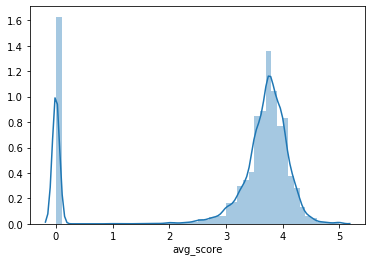

In [152]:
sns.distplot(df['avg_score'])

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35001 entries, 0 to 12305
Data columns (total 13 columns):
abv           32462 non-null object
avail         35001 non-null object
avg_score     35001 non-null float64
ba_score      8690 non-null float64
brewery       35001 non-null object
img           35001 non-null object
location      34984 non-null object
name          35001 non-null object
no_ratings    35001 non-null int64
no_reviews    35001 non-null int64
review        35001 non-null object
style         35001 non-null object
url           35001 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 3.7+ MB


In [154]:
df.describe()

,avg_score,ba_score,no_ratings,no_reviews
count,35001.000000,8690.000000,35001.000000,35001.000000
mean,3.113856,84.881703,58.093940,16.915774
std,1.416183,4.047656,408.700024,113.496037
min,0.000000,63.000000,0.000000,0.000000
25%,3.270000,83.000000,1.000000,0.000000
50%,3.690000,85.000000,2.000000,1.000000
75%,3.910000,87.000000,9.000000,3.000000
max,5.000000,100.000000,16192.000000,4017.000000


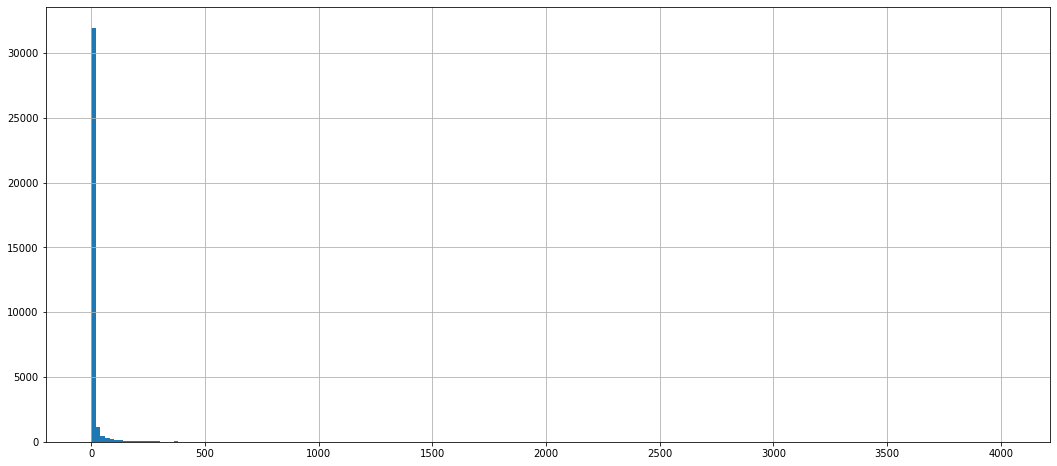

In [155]:
df['no_reviews'].hist(figsize = (18,8), bins=200)

In [117]:
samp_rev_empty = df.iloc[970]['review']

In [119]:
len(samp_rev_empty)

2

In [84]:
type(samp_rev)

str

In [156]:
samp_rev

'[\'3.31/5\\xa0\\xa0rDev -8.1%look: 4 | smell: 3.5 | taste: 3 | feel: 3.25 | overall: 3.5Alright - this is one of those ‘it depends’ beers. Great deep copper, molasses color and pours with a brief head. Nice mouth feel with a good swallow. LET IT WARM UP A BIT is my best advice. Doesn’t do much when super cold, but a nice bread malt aroma...maybe a touch of spice is in there if you give it a chance. Not over the top and a reasonable bock buuuut a touch of hops may set some people off. I like this beer with dinner when I’m out eating warm, winter comfort food. Not a 4-5 range beer to buy to take home but a nice beverage on a cold night out.\\xa0566 charactersWilliamGustin, Yesterday at 11:04 PM\', \'2.74/5\\xa0\\xa0rDev -23.9%look: 3.5 | smell: 2.5 | taste: 2.75 | feel: 2.75 | overall: 2.75Very pretty copper color with no head to speak of.\\nSmell was disappointing. Maybe toast if I use my imagination...maybe.\\nThe first thing I tasted was hops. And if you like hops, that\\\'s great. B

In [89]:
def clean_review(review):
    cleaned_review = ""
    for char in review:
#         if not '[' in line and  not ']' in line:
        for symbol in ",?!''\n/%":
            char = char.replace(symbol, '').lower()
        cleaned_review += (char)
    return cleaned_review

cleaned_review = clean_review(samp_rev)
cleaned_review

print(cleaned_review)

[3.315\xa0\xa0rdev -8.1look: 4 | smell: 3.5 | taste: 3 | feel: 3.25 | overall: 3.5alright - this is one of those ‘it depends’ beers. great deep copper molasses color and pours with a brief head. nice mouth feel with a good swallow. let it warm up a bit is my best advice. doesn’t do much when super cold but a nice bread malt aroma...maybe a touch of spice is in there if you give it a chance. not over the top and a reasonable bock buuuut a touch of hops may set some people off. i like this beer with dinner when i’m out eating warm winter comfort food. not a 4-5 range beer to buy to take home but a nice beverage on a cold night out.\xa0566 characterswilliamgustin yesterday at 11:04 pm 2.745\xa0\xa0rdev -23.9look: 3.5 | smell: 2.5 | taste: 2.75 | feel: 2.75 | overall: 2.75very pretty copper color with no head to speak of.\nsmell was disappointing. maybe toast if i use my imagination...maybe.\nthe first thing i tasted was hops. and if you like hops that\s great. but i don\t love them and sa

In [157]:
def get_avg_taste(string):
    list_list = [re.findall("\d{1}\.*\d*", item) for item in re.findall("taste: \d{1}\.*\d*", string)]
    sum_feel = 0
    tot = len(list_list)
    for list_item in list_list:
        for item in list_item:
            sum_feel += float(item)
    if not tot == 0:
        return sum_feel/tot
    else:
        return None

In [158]:
def get_avg_look(string):
    list_list = [re.findall("\d{1}\.*\d*", item) for item in re.findall("look: \d{1}\.*\d*", string)]
    sum_feel = 0
    tot = len(list_list)
    for list_item in list_list:
        for item in list_item:
            sum_feel += float(item)
    if not tot == 0:
        return sum_feel/tot
    else:
        return None

In [159]:
def get_avg_smell(string):
    list_list = [re.findall("\d{1}\.*\d*", item) for item in re.findall("smell: \d{1}\.*\d*", string)]
    sum_feel = 0
    tot = len(list_list)
    for list_item in list_list:
        for item in list_item:
            sum_feel += float(item)
    if not tot == 0:
        return sum_feel/tot
    else:
        return None

In [160]:
def get_avg_feel(string):
    list_list = [re.findall("\d{1}\.*\d*", item) for item in re.findall("smell: \d{1}\.*\d*", string)]
    sum_feel = 0
    tot = len(list_list)
    for list_item in list_list:
        for item in list_item:
            sum_feel += float(item)
    if not tot == 0:
        return sum_feel/tot
    else:
        return None

In [161]:
df['taste_avg'] = df['review'].apply(get_avg_taste)

In [162]:
df['look_avg'] = df['review'].apply(get_avg_look)
df['smell_avg'] = df['review'].apply(get_avg_smell)
df['feel_avg'] = df['review'].apply(get_avg_feel)

If image is placeholer, change to None

In [196]:
df.loc[df['img'] == "https://cdn.beeradvocate.com/im/placeholder-beer.jpg", 'img'] = None

In [163]:
df.head()

,abv,avail,avg_score,ba_score,brewery,img,location,name,no_ratings,no_reviews,review,style,url,taste_avg,look_avg,smell_avg,feel_avg
0,5.6%,Winter,3.60,82.0,Boston Beer Company (Samuel Adams),https://cdn.beeradvocate.com/im/beers/101.jpg,Massachusetts,Samuel Adams Winter Lager,6210,2048,['3.31/5\xa0\xa0rDev -8.1%look: 4 | smell: 3.5...,German Bock,https://www.beeradvocate.com/beer/profile/35/101/,3.56,3.76,3.48,3.48
1,4.4%,Year-round,3.19,73.0,Spoetzl Brewery,https://cdn.beeradvocate.com/im/beers/101.jpg,Texas,Shiner Bock,4331,1163,"[""3.19/5\xa0\xa0rDev 0%look: 3.75 | smell: 2.7...",German Bock,https://www.beeradvocate.com/beer/profile/143/...,3.47,3.76,3.31,3.31
2,5.8%,Rotating,3.66,83.0,Boston Beer Company (Samuel Adams),https://cdn.beeradvocate.com/im/beers/101.jpg,Massachusetts,Samuel Adams Chocolate Bock,3101,1225,['3.78/5\xa0\xa0rDev +3.3%look: 3.75 | smell: ...,German Bock,https://www.beeradvocate.com/beer/profile/35/1...,3.65,3.64,3.59,3.59
3,5.2%,Year-round,2.89,68.0,Anheuser-Busch,https://cdn.beeradvocate.com/im/beers/101.jpg,Missouri,Michelob AmberBock,1906,707,"[""3.09/5\xa0\xa0rDev +6.9%look: 3.5 | smell: 2...",German Bock,https://www.beeradvocate.com/beer/profile/29/1...,3.24,3.62,3.27,3.27
4,5.8%,Rotating,3.50,80.0,Boston Beer Company (Samuel Adams),https://cdn.beeradvocate.com/im/beers/101.jpg,Massachusetts,Samuel Adams Cherry Chocolate Bock,873,187,['3/5\xa0\xa0rDev -14.3%look: 3 | smell: 3 | t...,German Bock,https://www.beeradvocate.com/beer/profile/35/6...,3.28,3.69,3.62,3.62


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35001 entries, 0 to 12305
Data columns (total 17 columns):
abv           32462 non-null object
avail         35001 non-null object
avg_score     35001 non-null float64
ba_score      8690 non-null float64
brewery       35001 non-null object
img           35001 non-null object
location      34984 non-null object
name          35001 non-null object
no_ratings    35001 non-null int64
no_reviews    35001 non-null int64
review        35001 non-null object
style         35001 non-null object
url           35001 non-null object
taste_avg     28390 non-null float64
look_avg      28390 non-null float64
smell_avg     28390 non-null float64
feel_avg      28390 non-null float64
dtypes: float64(6), int64(2), object(9)
memory usage: 4.8+ MB


In [165]:
df['style'].nunique()

30

In [167]:
df.nunique()

abv             333
avail             8
avg_score       334
ba_score         38
brewery        9858
img            8283
location        193
name          29283
no_ratings     1080
no_reviews      608
review        29189
style            30
url           35000
taste_avg      1026
look_avg        838
smell_avg      1017
feel_avg       1017
dtype: int64

In [168]:
samp_rev

'[\'3.31/5\\xa0\\xa0rDev -8.1%look: 4 | smell: 3.5 | taste: 3 | feel: 3.25 | overall: 3.5Alright - this is one of those ‘it depends’ beers. Great deep copper, molasses color and pours with a brief head. Nice mouth feel with a good swallow. LET IT WARM UP A BIT is my best advice. Doesn’t do much when super cold, but a nice bread malt aroma...maybe a touch of spice is in there if you give it a chance. Not over the top and a reasonable bock buuuut a touch of hops may set some people off. I like this beer with dinner when I’m out eating warm, winter comfort food. Not a 4-5 range beer to buy to take home but a nice beverage on a cold night out.\\xa0566 charactersWilliamGustin, Yesterday at 11:04 PM\', \'2.74/5\\xa0\\xa0rDev -23.9%look: 3.5 | smell: 2.5 | taste: 2.75 | feel: 2.75 | overall: 2.75Very pretty copper color with no head to speak of.\\nSmell was disappointing. Maybe toast if I use my imagination...maybe.\\nThe first thing I tasted was hops. And if you like hops, that\\\'s great. B

#### I would like to create a function to clean and tokenize the review text

In [180]:
stop_words.extend(['look', 'smell', 'taste', 'feel', 'overall'])

In [183]:
def clean_review(review):
#     review = re.sub(r'(\\xa){1}\d*(rdev)*', '', review)
    review = re.sub(r'\d+[\.:-]*', '', review)
    cleaned_review = ""
    for char in review:
        for symbol in ",?!''\n/%|:":
            char = char.replace(symbol, '').lower()
        cleaned_review += (char)
    return gensim.utils.simple_preprocess(str(review), deacc=True)

cleaned_review = clean_review(samp_rev)
cleaned_review

print(cleaned_review)

['xa', 'xardev', 'look', 'smell', 'taste', 'feel', 'overall', 'alright', 'this', 'is', 'one', 'of', 'those', 'it', 'depends', 'beers', 'great', 'deep', 'copper', 'molasses', 'color', 'and', 'pours', 'with', 'brief', 'head', 'nice', 'mouth', 'feel', 'with', 'good', 'swallow', 'let', 'it', 'warm', 'up', 'bit', 'is', 'my', 'best', 'advice', 'doesn', 'do', 'much', 'when', 'super', 'cold', 'but', 'nice', 'bread', 'malt', 'aroma', 'maybe', 'touch', 'of', 'spice', 'is', 'in', 'there', 'if', 'you', 'give', 'it', 'chance', 'not', 'over', 'the', 'top', 'and', 'reasonable', 'bock', 'buuuut', 'touch', 'of', 'hops', 'may', 'set', 'some', 'people', 'off', 'like', 'this', 'beer', 'with', 'dinner', 'when', 'out', 'eating', 'warm', 'winter', 'comfort', 'food', 'not', 'range', 'beer', 'to', 'buy', 'to', 'take', 'home', 'but', 'nice', 'beverage', 'on', 'cold', 'night', 'out', 'xa', 'yesterday', 'at', 'pm', 'xa', 'xardev', 'look', 'smell', 'taste', 'feel', 'overall', 'very', 'pretty', 'copper', 'color', '

In [185]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(mess)
        
    # Now just remove any stopwords
    return [word for word in mess.split() if word.lower() not in stopwords.words('english')] 

In [186]:
text_process(samp_rev)

NameError: name 'string' is not defined

In [175]:
for word in samp_rev:
    word = re.sub("\\n", ' ', samp_rev)
samp_rev

'[\'3.31/5\\xa0\\xa0rDev -8.1%look: 4 | smell: 3.5 | taste: 3 | feel: 3.25 | overall: 3.5Alright - this is one of those ‘it depends’ beers. Great deep copper, molasses color and pours with a brief head. Nice mouth feel with a good swallow. LET IT WARM UP A BIT is my best advice. Doesn’t do much when super cold, but a nice bread malt aroma...maybe a touch of spice is in there if you give it a chance. Not over the top and a reasonable bock buuuut a touch of hops may set some people off. I like this beer with dinner when I’m out eating warm, winter comfort food. Not a 4-5 range beer to buy to take home but a nice beverage on a cold night out.\\xa0566 charactersWilliamGustin, Yesterday at 11:04 PM\', \'2.74/5\\xa0\\xa0rDev -23.9%look: 3.5 | smell: 2.5 | taste: 2.75 | feel: 2.75 | overall: 2.75Very pretty copper color with no head to speak of.\\nSmell was disappointing. Maybe toast if I use my imagination...maybe.\\nThe first thing I tasted was hops. And if you like hops, that\\\'s great. B